In [1]:
import gempyor # incidCshift_delta_R13
from gempyor import seir, config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import glob, os, sys
from pathlib import Path

# import seaborn as sns
import matplotlib._color_data as mcd
import pyarrow.parquet as pq
import click

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.backends.backend_pdf import PdfPages

  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: SMH_R14_restBoo_noVar_blk5,
  gempyor >> prefix: USA/inference/med/SMH_R14_restBoo_noVar_blk5/global/intermediate/000000001.;


INFO:root:[Outcomes.NPI] completed in 1.46 s


In [ ]:

config_filepath = "config_SMH_R14_restBoo_noVar_blk5.yml"

gempyor_simulator = gempyor.InferenceSimulator(
    config_path=config_filepath,
    run_id="SMH_R14_restBoo_noVar_blk5",
    prefix="USA/inference/med/SMH_R14_restBoo_noVar_blk5/global/intermediate/000000001.",
    first_sim_index=1,
    scenario="inference",  # NPIs scenario to use
    deathrate="med",  # Outcome scenario to use
    stoch_traj_flag=False,
    spatial_path_prefix="./",  # prefix where to find the folder indicated in spatial_setup$
)
config.clear()
config.read(user=False)
config.set_file(config_filepath)

gempyor_simulator.get_outcome_npi()

In [2]:
gempyor_simulator.one_simulation(sim_id2write=10, load_ID=True, sim_id2load=5)

Loaded geoids in loaded relative probablity file: 51 Intersect with seir simulation:  51 kept


/Users/chadi/opt/miniconda3/envs/covidSProd6/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
INFO:root:[Outcome.structure] completed in 2.39 s
INFO:root:[SEIR.compartments] completed in 102.98 s
INFO:root:[SEIR.NPI] completed in 48.01 s
INFO:root:[Outcomes.NPI] completed in 1.14 s
INFO:root:[onerun_SEIR.seeding] completed in 5.24 s
INFO:root:[SEIR.parameters] completed in 0.20 s
INFO:root:Integrating with method rk4.jit
625it [02:06,  4.94it/s]
INFO:root:[SEIR.compute] completed in 128.31 s
INFO:root:[SEIR.postprocess] completed in 5.43 s
/Users/chadi/opt/miniconda3/envs/covidSProd6/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

0

In [3]:
out_df = gempyor_simulator.debug_out_df

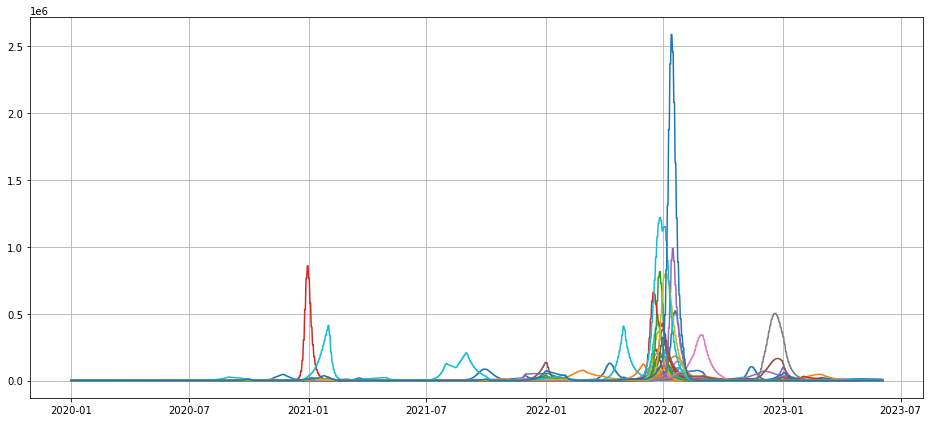

In [5]:
comp_to_plot = "I1" #["S", "E", "I1", "I2", "I3", "R", "W"] 
vt= 'incidence'
all_S = out_df[(out_df['mc_value_type'] == vt) & (out_df['mc_infection_stage'] == comp_to_plot)].reset_index(drop=True).groupby('date').sum()


fig, ax = plt.subplots(1,1, figsize=(16,7))
ax.plot(all_S)
ax.grid()


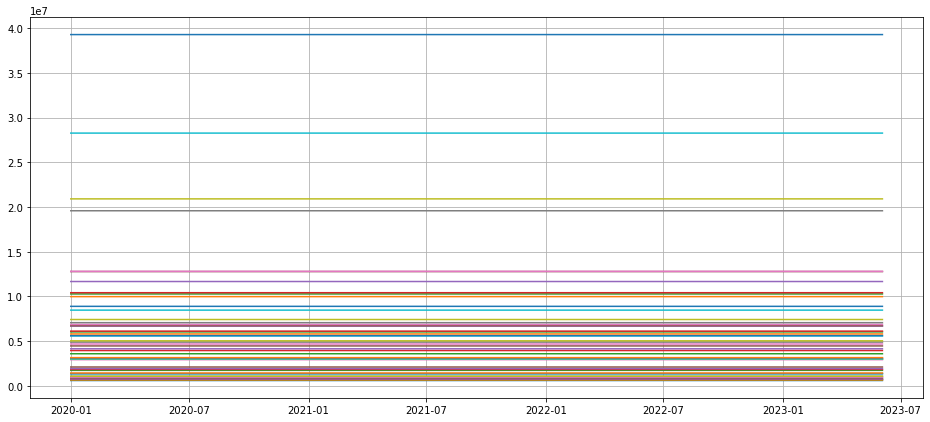

In [6]:
#plot pop
all_S = out_df[(out_df['mc_value_type'] == 'prevalence')].reset_index(drop=True).groupby('date').sum()


fig, ax = plt.subplots(1,1, figsize=(16,7))
ax.plot(all_S)

ax.grid()


In [17]:
vt= 'prevalence'
mc_to_plot = 'mc_vaccination_stage'

for mc_to_plot in [mc_tp for mc_tp in out_df.columns if ('mc' in mc_tp and mc_tp != 'mc_name' and mc_tp != 'mc_value_type')]:

    fig, axes = plt.subplots(len(out_df[mc_to_plot].unique())//2+len(out_df[mc_to_plot].unique())%2,2, figsize=(16,7), sharex=True)

    for i, comp_to_plot in enumerate(out_df[mc_to_plot].unique()):
        ax = axes.flat[i]
        all_S = out_df[(out_df['mc_value_type'] == vt) & (out_df[mc_to_plot] == comp_to_plot)].reset_index(drop=True).groupby('date').sum()

        ax.plot(all_S)
        ax.grid()
        ax.set_title(f"{vt} {comp_to_plot}")

['mc_value_type',
 'mc_infection_stage',
 'mc_vaccination_stage',
 'mc_variant_type',
 'mc_age_strata']

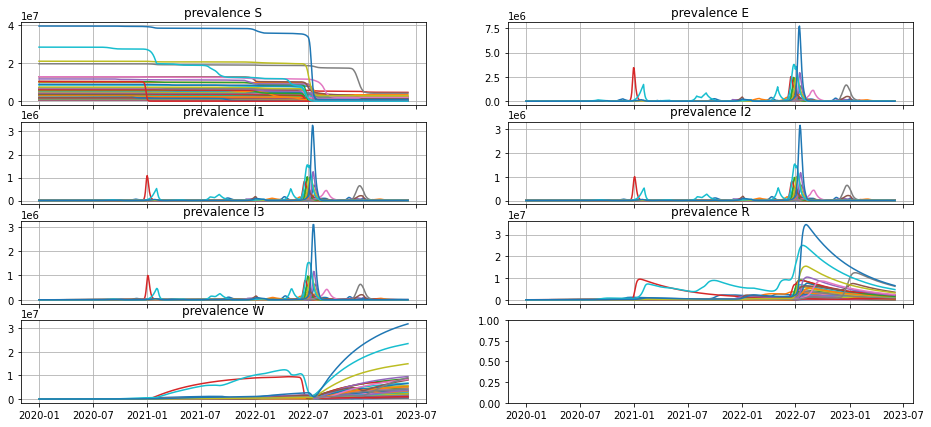

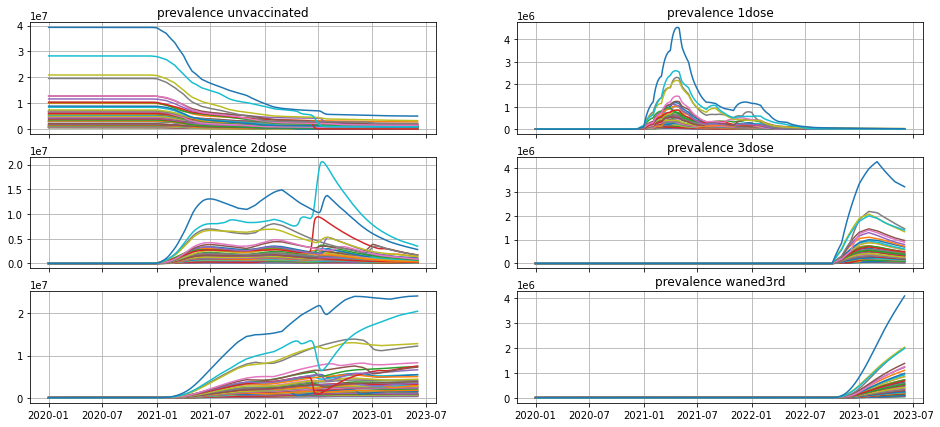

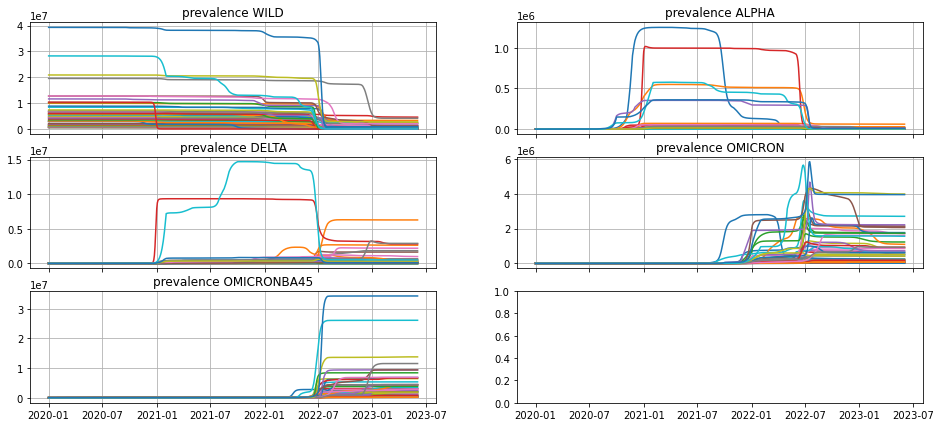

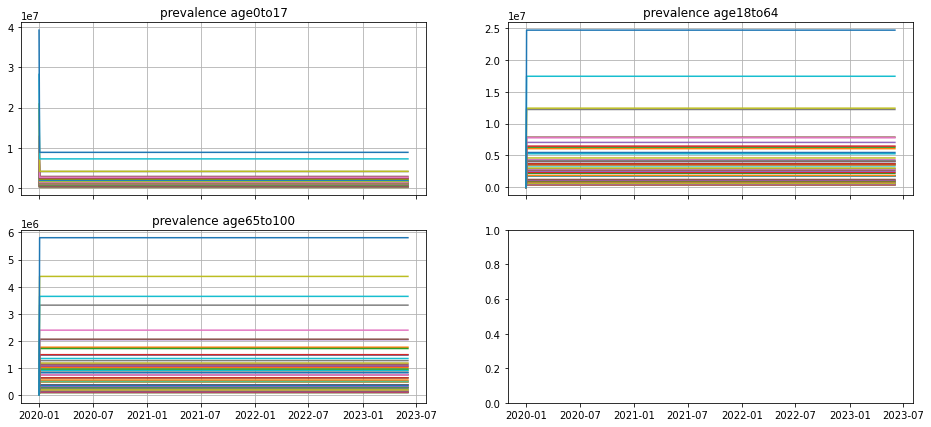

In [22]:
vt= 'prevalence'
mc_to_plot = 'mc_vaccination_stage'

for mc_to_plot in [mc_tp for mc_tp in out_df.columns if ('mc' in mc_tp and mc_tp != 'mc_name' and mc_tp != 'mc_value_type')]:

    fig, axes = plt.subplots(len(out_df[mc_to_plot].unique())//2+len(out_df[mc_to_plot].unique())%2,2, figsize=(16,7), sharex=True)

    for i, comp_to_plot in enumerate(out_df[mc_to_plot].unique()):
        ax = axes.flat[i]
        all_S = out_df[(out_df['mc_value_type'] == vt) & (out_df[mc_to_plot] == comp_to_plot)].reset_index(drop=True).groupby('date').sum()

        ax.plot(all_S)
        ax.grid()
        ax.set_title(f"{vt} {comp_to_plot}")

In [ ]:
vt= 'prevalence'
mc_to_plot = "mc_name"

fig, axes = plt.subplots(30,21,figsize=(80,80), sharex=True)

for i, comp_to_plot in enumerate(out_df[mc_to_plot].unique()):
    ax = axes.flat[i]
    all_S = out_df[(out_df['mc_value_type'] == vt) & (out_df[mc_to_plot] == comp_to_plot)].reset_index(drop=True).groupby('date').sum()

    ax.plot(all_S.sum(axis=1))
    ax.grid()
    ax.set_title(f"{comp_to_plot}")
plt.savefig("all_comp.pdf")

In [62]:
len(gempyor_simulator.unique_strings)

65

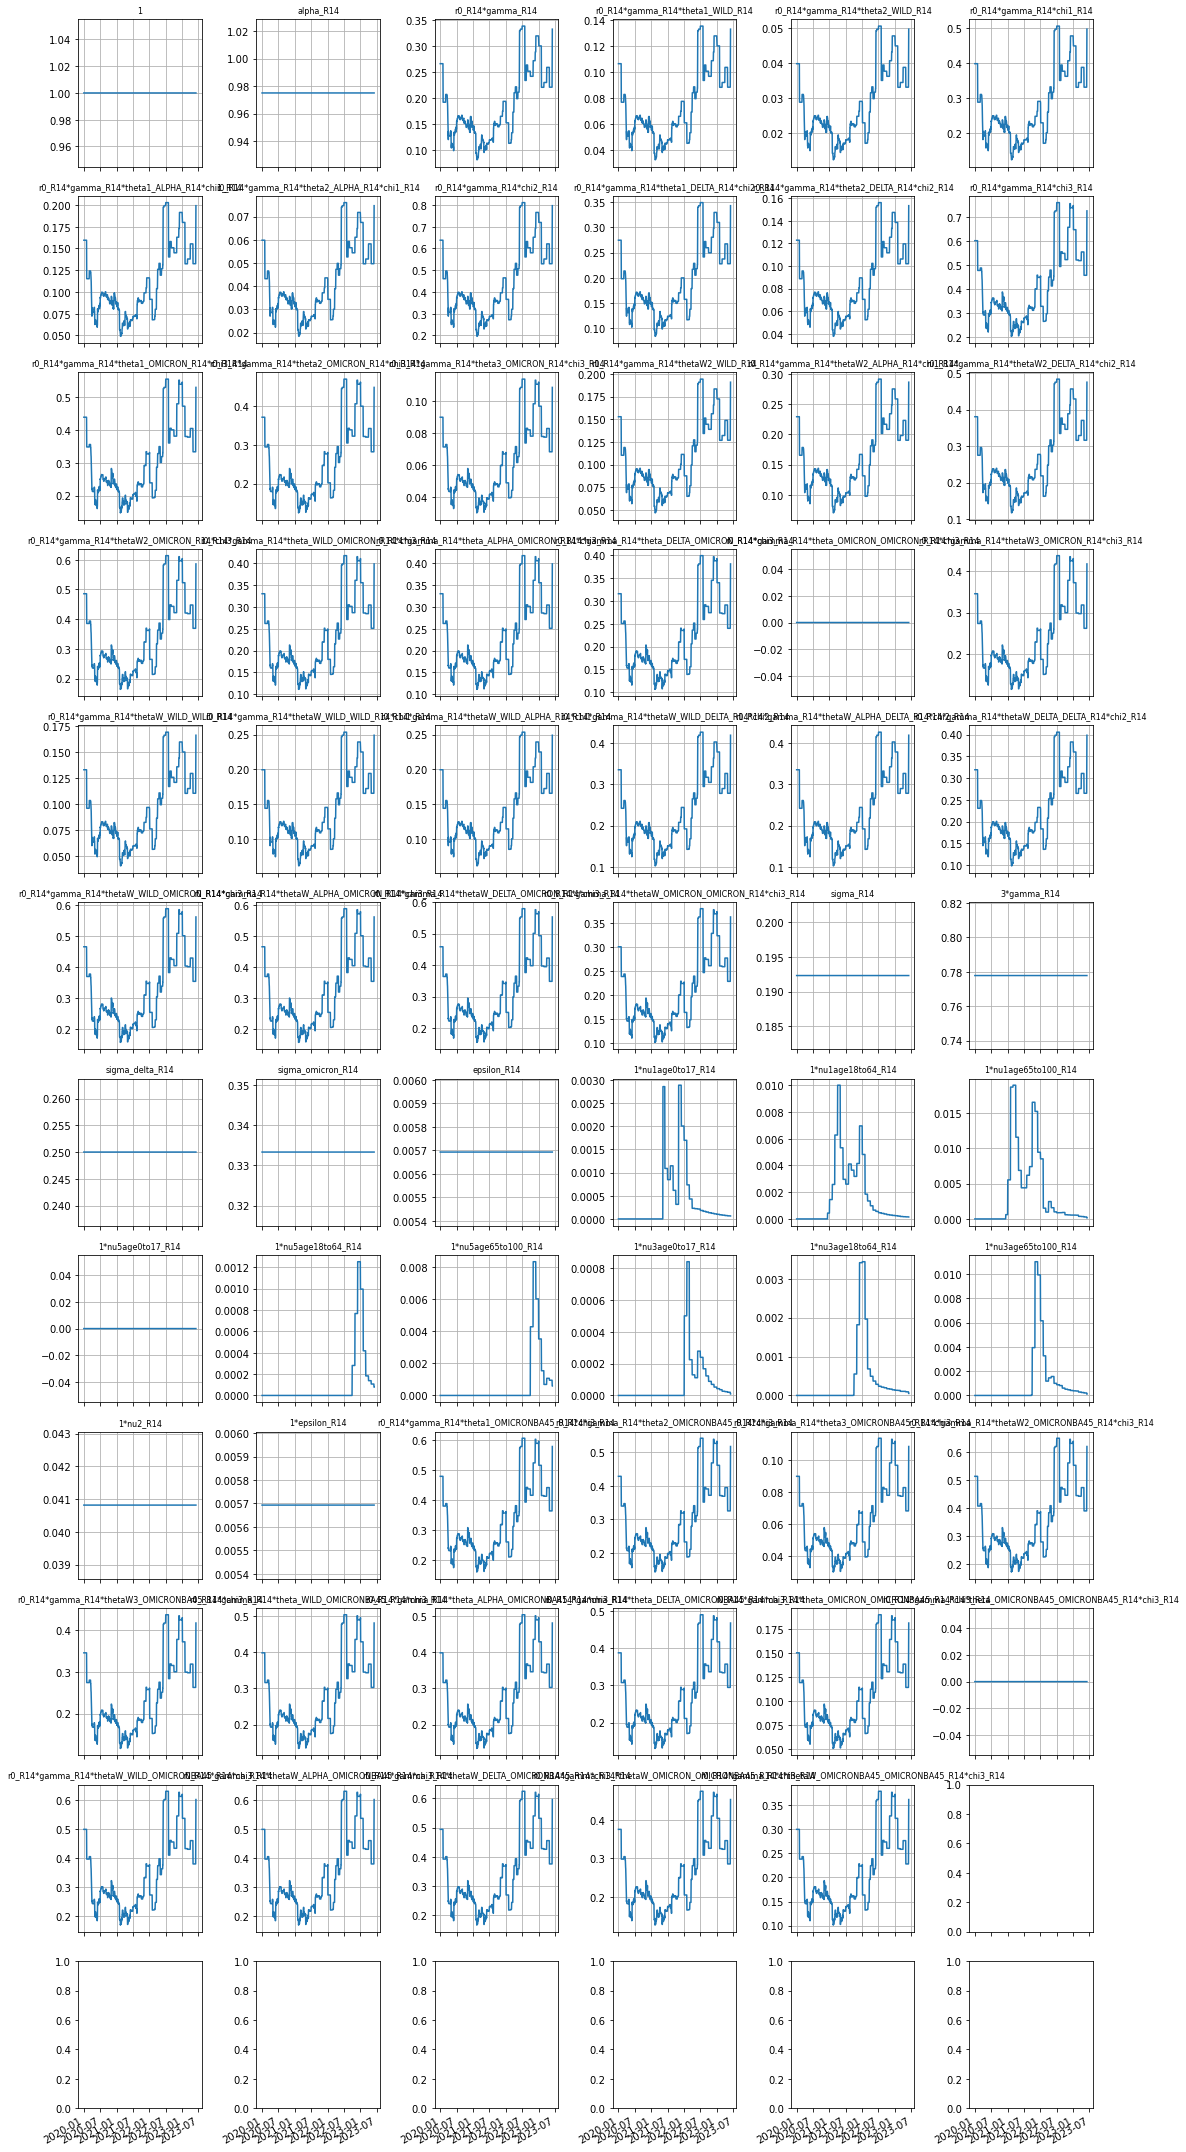

In [64]:
parsed_parametres = gempyor_simulator.debug_parsed_parameters


fig, axes = plt.subplots(12, 6, figsize=(15, 30), sharex=True)

for k, uniq_pname in enumerate(gempyor_simulator.unique_strings):
    ax = axes.flat[k]
    ax.set_title(uniq_pname, fontdict=tsize=8)
    ax.grid()
    df = pd.DataFrame(parsed_parameters[k,:].mean(axis=1), index=pd.date_range(gempyor_simulator.s.ti, gempyor_simulator.s.tf, freq="D"))
    ax.plot(df)

fig.autofmt_xdate()
fig.tight_layout()
plt.savefig("all_parameters.pdf")

In [ ]:
pdf = PdfPages(f'Unique Parsed Parameter taking just nu for {config_filepath[:-4]}.pdf')
d = pdf.infodict()
d["Title"] = "parsed parameters"
d["Author"] = "jlemaitre"

for k,uniq_pname in enumerate(gempyor_simulator.unique_strings):
    if 'nu' in uniq_pname:
        fig, axes = plt.subplots(7, 8, figsize=(20, 30), sharex=True, sharey=True)
        fig.suptitle(uniq_pname, fontsize=22)
        print(uniq_pname)
        for i, geoid in enumerate(gempyor_simulator.s.spatset.nodenames):
            ax = axes.flat[i]
            ax.set_title(geoid)
            ax.grid()
            df = pd.DataFrame(parsed_parameters[k,:,i], index=pd.date_range(gempyor_simulator.s.ti, gempyor_simulator.s.tf, freq="D"))
            ax.plot(df[:'2021-12-31'])
            fig.autofmt_xdate()
        fig.tight_layout()
        pdf.savefig(fig)
pdf.close()

## Build it step by step

In [ ]:
npi_seir = gempyor_simulator.get_seir_npi(load_ID=True, sim_id2load=0)

In [ ]:

params_draw_arr = gempyor_simulator.get_seir_parameters(load_ID=True, sim_id2load=0)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_spar_df>) or (bypass_FN=<some_spar_filename>)
parameters = gempyor_simulator.get_seir_parameter_reduced(npi_seir=npi_seir, p_draw=params_draw_arr)  # this is a df. TODO: make it also as.df as option
parameters =  gempyor_simulator.s.parameters.parameters_reduce(params_draw_arr, npi_seir)
parsed_parameters = gempyor_simulator.s.compartments.parse_parameters(
                    parameters, gempyor_simulator.s.parameters.pnames, gempyor_simulator.unique_strings
                )

In [ ]:
outcomes = gempyor.read_df('model_output/hosp/USA/inference/med/2022.06.21.14:47:23.UTC/global/intermediate/000000001.000000000.2022.06.21.14:47:23.UTC.hosp.parquet')

In [ ]:
outcomes[['date', 'geoid', 'incidC']].pivot(index='date', columns='geoid', values='incidC').plot(subplots=True, figsize=(5,30));

In [ ]:
outcomes[['date', 'geoid', 'incidD']].pivot(index='date', columns='geoid', values='incidD').plot(subplots=True, figsize=(5,30));

In [ ]:
setup= gempyor_simulator.s
sim_id=0
seeding = pd.read_csv(
                setup.get_input_filename(
                    ftype=setup.seeding_config["seeding_file_type"],
                    sim_id=sim_id,
                    extension_override="csv",
                ),
                converters={"place": lambda x: str(x)},
                parse_dates=["date"],
            )
amounts = seeding["amount"]
seeding = seeding.sort_values(by="date", axis="index").reset_index()
amounts


In [ ]:
seeding_dict, seeding_amounts = gempyor.seeding_ic._DataFrame2NumbaDict(df=seeding, amounts=amounts, setup=setup)

In [ ]:
gempyor_simulator.plot_transition_graph(
    output_file="readable_graph",
    source_filters=[["age0to17"], ["OMICRON", "WILD"]],
    destination_filters=[["OMICRON", "WILD"]],
)

In [ ]:
gempyor_simulator.plot_transition_graph(output_file="full_graph")

In [ ]:
gempyor_simulator.one_simulation(sim_id2write=6, load_ID=True, sim_id2load=5)

In [ ]:
gempyor_simulator.get_seir_npi()

```python
npi_seir = (
    gempyor_simulator.get_seir_npi()
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_snpi_df>) or (bypass_FN=<some_snpi_filename>)
npi_outcome = (
    gempyor_simulator.get_outcome_npi()
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_hnpi_df>) or (bypass_FN=<some_hnpi_filename>)
params_draw_df = (
    gempyor_simulator.get_seir_parametersDF()
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_spar_df>) or (bypass_FN=<some_spar_filename>)
params_draw_arr = (
    gempyor_simulator.get_seir_parameters()
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_spar_df>) or (bypass_FN=<some_spar_filename>)
param_reduc = gempyor_simulator.get_seir_parameter_reduced(
    npi_seir=npi_seir
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_spar_df>) or (bypass_FN=<some_spar_filename>)
param_reduc_from = gempyor_simulator.get_seir_parameter_reduced(
    npi_seir=npi_seir, p_draw=params_draw_arr
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_spar_df>) or (bypass_FN=<some_spar_filename>)
```

In [ ]:
npi_outcome = gempyor_simulator.get_outcome_npi(bypass_FN=fn)

## Compare with FCH


In [2]:
gempyor_simulator_alt = gempyor.InferenceSimulator(
    config_path="config_FCH_R13_pessWan_noVar_blk5_rk4_Jul3.yml",
    run_id="FCH_R13_pessWan_noVar_blk5_rk4_Jul3",
    prefix="USA/inference/med/FCH_R13_pessWan_noVar_blk5_rk4_Jul3/global/intermediate/000000001.",
    first_sim_index=1,
    scenario="inference",  # NPIs scenario to use
    deathrate="med",  # Outcome scenario to use
    stoch_traj_flag=False,
    spatial_path_prefix="./",  # prefix where to find the folder indicated in spatial_setup$
)

  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: FCH_R13_pessWan_noVar_blk5_rk4_Jul3,
  gempyor >> prefix: USA/inference/med/FCH_R13_pessWan_noVar_blk5_rk4_Jul3/global/intermediate/000000001.;


-102354456.97281416 -101842251.234276


In [3]:
print(f"FCH: llik from {gempyor_simulator_alt.s.read_simID(ftype='llik', sim_id=1).ll.sum():.10} to {gempyor_simulator_alt.s.read_simID(ftype='llik', sim_id=2).ll.sum():.10} in 100 sims")
print(f"SMH: llik from {gempyor_simulator.s.read_simID(ftype='llik', sim_id=1).ll.sum():.10} to {gempyor_simulator.s.read_simID(ftype='llik', sim_id=5).ll.sum():.10} in 250 sims")

FCH: llik from -102354457.0 to -101842251.2 in 100 sims
SMH: llik from -434284079.2 to -335088237.8 in 250 sims


In [8]:
gempyor_simulator_alt.s.read_simID(ftype='llik', sim_id=1)

,ll,filename,geoid,accept,accept_avg,accept_prob
0,-1.007941e+06,model_output/llik/USA/inference/med/FCH_R13_pe...,01000,1.0,0.071429,1.0
1,-2.699470e+05,model_output/llik/USA/inference/med/FCH_R13_pe...,02000,1.0,0.071429,1.0
2,-2.709728e+06,model_output/llik/USA/inference/med/FCH_R13_pe...,04000,1.0,0.071429,1.0
3,-7.981336e+05,model_output/llik/USA/inference/med/FCH_R13_pe...,05000,1.0,0.071429,1.0
4,-1.016942e+07,model_output/llik/USA/inference/med/FCH_R13_pe...,06000,1.0,0.071429,1.0
5,-1.706134e+06,model_output/llik/USA/inference/med/FCH_R13_pe...,08000,1.0,0.071429,1.0
6,-1.351136e+06,model_output/llik/USA/inference/med/FCH_R13_pe...,09000,1.0,0.071429,1.0
7,-3.028198e+05,model_output/llik/USA/inference/med/FCH_R13_pe...,10000,1.0,0.071429,1.0
8,-2.114849e+05,model_output/llik/USA/inference/med/FCH_R13_pe...,11000,1.0,0.071429,1.0
9,-5.995409e+06,model_output/llik/USA/inference/med/FCH_R13_pe...,12000,1.0,0.071429,1.0


In [103]:
seed_fch = gempyor_simulator_alt.s.read_simID(ftype='seed', sim_id=2,  extension_override='csv')
seed_smh = gempyor_simulator.s.read_simID(ftype='seed', sim_id=5,  extension_override='csv')

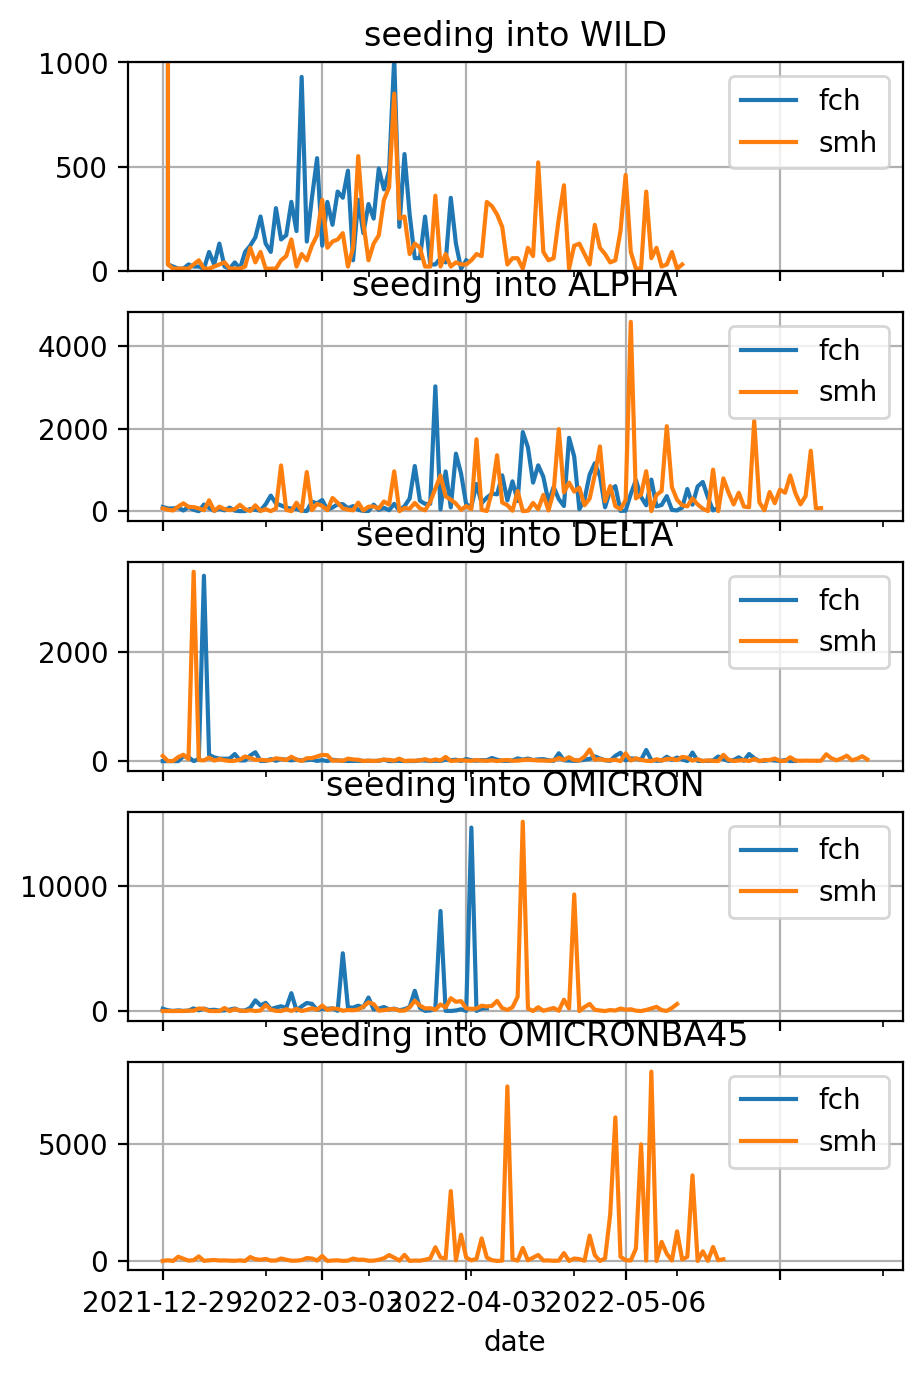

In [160]:
dt = {'fch': seed_fch, 'smh': seed_smh}
fig, axes = plt.subplots(5, 1, figsize=(5, 8), dpi=200, sharex=True)

for i, var in enumerate(seed_smh["destination_variant_type"].unique()): 
    ax = axes.flat[i]
    for key, df in dt.items():
        df = df[df["destination_variant_type"] == var] # .pivot(index = "date", values = "amount", columns="place")
        #ax.plot(df.groupby(["place", "date"]).sum().reset_index().pivot(index = "date", values = "amount", columns="place").sum(axis=1).sort_index(), label = key)
        df.groupby(["place", "date"]).sum().reset_index().pivot(index = "date", values = "amount", columns="place").sum(axis=1).sort_index().plot(ax=ax, label=key)
        ax.legend()
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        ax.grid()
        if var == 'WILD': ax.set_ylim(0,1000)
        ax.set_title(f"seeding into {var}")
plt.savefig('seeding_compare.pdf')

In [167]:

gempyor_simulator_altw = gempyor.InferenceSimulator(
    config_path="config_FCH_R13_pessWan_noVar_blk5_rk4_Jun12.yml",
    run_id="FCH_R13_pessWan_noVar_blk5_rk4_Jun12",
    prefix="USA/inference/med/FCH_R13_pessWan_noVar_blk5_rk4_Jun12/global/intermediate/000000001.",
    first_sim_index=1,
    scenario="inference",  # NPIs scenario to use
    deathrate="med",  # Outcome scenario to use
    stoch_traj_flag=False,
    spatial_path_prefix="./",  # prefix where to find the folder indicated in spatial_setup$
)
gp = {'fch': gempyor_simulator_alt, 'smh': gempyor_simulator, 'fch_from': gempyor_simulator_altw}

  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: FCH_R13_pessWan_noVar_blk5_rk4_Jun12,
  gempyor >> prefix: USA/inference/med/FCH_R13_pessWan_noVar_blk5_rk4_Jun12/global/intermediate/000000001.;


In [ ]:
config_filepath = "config_SMH_R14_restBoo_noVar_blk5.yml"
config.clear()
config.read(user=False)
config.set_file(config_filepath)
gp['smh'].one_simulation(sim_id2write=10, load_ID=True, sim_id2load=1)

config_filepath = "config_FCH_R13_pessWan_noVar_blk5_rk4_Jun12.yml"
config.clear()
config.read(user=False)
config.set_file(config_filepath)
gp['fch_from'].one_simulation(sim_id2write=10, load_ID=True, sim_id2load=2)


config_filepath = "config_FCH_R13_pessWan_noVar_blk5_rk4_Jul3.yml"
config.clear()
config.read(user=False)
config.set_file(config_filepath)
gp['fch'].one_simulation(sim_id2write=10, load_ID=True, sim_id2load=2)

In [210]:
config_filepath = "config_SMH_R14_restBoo_noVar_blk5.yml"
config.clear()
config.read(user=False)
config.set_file(config_filepath)
gp['smh'].one_simulation(sim_id2write=10, load_ID=True, sim_id2load=1)

INFO:root:[SEIR.NPI] completed in 54.14 s
INFO:root:[Outcomes.NPI] completed in 1.14 s
INFO:root:[onerun_SEIR.seeding] completed in 3.75 s
INFO:root:[SEIR.parameters] completed in 0.20 s
INFO:root:Integrating with method rk4.jit
625it [02:02,  5.12it/s]
INFO:root:[SEIR.compute] completed in 124.11 s
INFO:root:[SEIR.postprocess] completed in 6.25 s
/Users/chadi/opt/miniconda3/envs/covidSProd6/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
INFO:root:[onerun_delayframe_outcomes.compute] completed in 89.39 s
/Users/chadi/Documents/phd/COVIDScenarioPipeline/COVIDScenarioPipeline/gempyor_pkg/src/gempyor/outcomes.py:321: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

0

In [171]:
gsf = gp['fch_from']
gss = gp['smh']

In [201]:
from collections import Counter


In [202]:
print('_'*100)
print('_'*100)
print('_'*100)
onlyingsf = list((Counter(gsf.debug_npi_outcomes.getReductionDF()['npi_name'].to_list())-Counter(gss.debug_npi_outcomes.getReductionDF()['npi_name'].to_list())).elements())
onlyingss = list((Counter(gss.debug_npi_outcomes.getReductionDF()['npi_name'].to_list())-Counter(gsf.debug_npi_outcomes.getReductionDF()['npi_name'].to_list())).elements())
print(f"Outcomes_NPIs ONLY IN FCH12Jun: {onlyingsf}")
print('_'*100)
print(f"Outcomes_NPIs ONLY IN SMH: {onlyingss}")

____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Outcomes_NPIs ONLY IN FCH12Jun: ['AL_incidCshift1_R13', 'AL_incidCshift2_R13', 'AL_incidCshift_vacc_R13', 'AL_incidCshift_delta_R13', 'AL_incidCshiftOm_R13', 'AK_incidCshift_R13', 'AK_incidCshift_vacc_R13', 'AK_incidCshift_delta_R13', 'AK_incidCshiftOm_R13', 'AZ_incidCshift1_R13', 'AZ_incidCshift2_R13', 'AZ_incidCshift_vacc_R13', 'AZ_incidCshift_delta_R13', 'AZ_incidCshiftOm_R13', 'AR_incidCshift_R13', 'AR_incidCshift_vacc_R13', 'AR_incidCshift_delta_R13', 'AR_incidCshiftOm_R13', 'CA_incidCshift1_R13', 'CA_incidCshift2_R13', 'CA_incidCshift_vacc_R13', 'CA_incidCshift_delta_R13', 'CA_incidCshiftOm_R13', 'CO_incidCshift1_R13', 'CO_incidCshift2_R13', 'CO_incidCshift_vacc_R13', 'CO_incidCshif

In [197]:
print('_'*100)
print('_'*100)
print('_'*100)
onlyingsf = list((Counter(gsf.s.parameters.pnames)-Counter(gss.s.parameters.pnames)).elements())
onlyingss = list((Counter(gss.s.parameters.pnames)-Counter(gsf.s.parameters.pnames)).elements())
print(f"SEIR_parameters ONLY IN FCH12Jun: {onlyingsf}")
print('_'*100)
print(f"SEIR_parameters ONLY IN SMH: {onlyingss}")

____________________________________________________________________________________________________
SEIR_parameters ONLY IN FCH12Jun: ['sigma_R13', 'sigma_delta_R13', 'sigma_omicron_R13', 'alpha_R13', 'r0_R13', 'gamma_R13', 'epsilon_R13', 'chi1_R13', 'chi2_R13', 'chi3_R13', 'theta1_WILD_R13', 'theta2_WILD_R13', 'theta1_ALPHA_R13', 'theta2_ALPHA_R13', 'theta1_DELTA_R13', 'theta2_DELTA_R13', 'theta1_OMICRON_R13', 'theta2_OMICRON_R13', 'thetaEsc_OMICRON_R13', 'thetaW_OMICRON_R13', 'thetaW1_OMICRON_R13', 'nu1age0to17_R13', 'nu3age0to17_R13', 'nu1age18to64_R13', 'nu3age18to64_R13', 'nu1age65to100_R13', 'nu3age65to100_R13', 'nu2_R13']
____________________________________________________________________________________________________
SEIR_parameters ONLY IN SMH: ['sigma_R14', 'sigma_delta_R14', 'sigma_omicron_R14', 'alpha_R14', 'r0_R14', 'gamma_R14', 'epsilon_R14', 'chi1_R14', 'chi2_R14', 'chi3_R14', 'thetaW_WILD_WILD_R14', 'thetaW_WILD_ALPHA_R14', 'thetaW_WILD_DELTA_R14', 'theta_WILD_OMICR

In [208]:
onlyingsf = list((Counter(gsf.debug_hpar_df['outcome'].to_list())-Counter(gss.debug_hpar_df['outcome'].to_list())).elements())
onlyingss = list((Counter(gss.debug_hpar_df['outcome'].to_list())-Counter(gsf.debug_hpar_df['outcome'].to_list())).elements())
onlyingsf = [a for a in onlyingsf if 'R13' not in a]
onlyingss = [a for a in onlyingss if 'R14' not in a]
print(f"outcomes_parameters ONLY IN FCH12Jun, FILTERED FOR R13: {onlyingsf}")
print('_'*100)
print(f"outcomes_parameters ONLY IN SMH, FILTERED FOR R14: {onlyingss}")

outcomes_parameters ONLY IN FCH12Jun, FILTERED FOR R13: []
____________________________________________________________________________________________________
outcomes_parameters ONLY IN SMH, FILTERED FOR R14: []


In [207]:
print('_'*100)
print('_'*100)
print('_'*100)
onlyingsf = list((Counter(gsf.debug_npi_seir.getReductionDF()['npi_name'].to_list())-Counter(gss.debug_npi_seir.getReductionDF()['npi_name'].to_list())).elements())
onlyingss = list((Counter(gss.debug_npi_seir.getReductionDF()['npi_name'].to_list())-Counter(gsf.debug_npi_seir.getReductionDF()['npi_name'].to_list())).elements())
onlyingsf = [a for a in onlyingsf if 'R13' not in a]
onlyingss = [a for a in onlyingss if 'R14' not in a]
print(f"SEIR_NPIs ONLY IN FCH12Jun, FILTERED FOR R13: {onlyingsf}")
print('_'*100)
print(f"SEIR_NPIs ONLY IN SMH, FILTERED FOR R14: {onlyingss}")

____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
SEIR_NPIs ONLY IN FCH12Jun: ['FL_open_p4A', 'FL_open_p5A', 'FL_open_p6A', 'FL_open_p7A']
____________________________________________________________________________________________________
SEIR_NPIs ONLY IN SMH: ['summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'summer', 'su

yes 1
yes alpha_R14
yes r0_R14*gamma_R14
yes r0_R14*gamma_R14*theta1_WILD_R14
yes r0_R14*gamma_R14*theta2_WILD_R14
yes r0_R14*gamma_R14*chi1_R14
yes r0_R14*gamma_R14*theta1_ALPHA_R14*chi1_R14
yes r0_R14*gamma_R14*theta2_ALPHA_R14*chi1_R14
yes r0_R14*gamma_R14*chi2_R14
yes r0_R14*gamma_R14*theta1_DELTA_R14*chi2_R14
yes r0_R14*gamma_R14*theta2_DELTA_R14*chi2_R14
yes r0_R14*gamma_R14*chi3_R14
yes r0_R14*gamma_R14*theta1_OMICRON_R14*chi3_R14
yes r0_R14*gamma_R14*theta2_OMICRON_R14*chi3_R14
yes sigma_R14
yes 3*gamma_R14
yes sigma_delta_R14
yes sigma_omicron_R14
yes epsilon_R14
yes 1*nu1age0to17_R14
yes 1*nu1age18to64_R14
yes 1*nu1age65to100_R14
yes 1*nu3age0to17_R14
yes 1*nu3age18to64_R14
yes 1*nu3age65to100_R14
yes 1*nu2_R14
yes 1*epsilon_R14


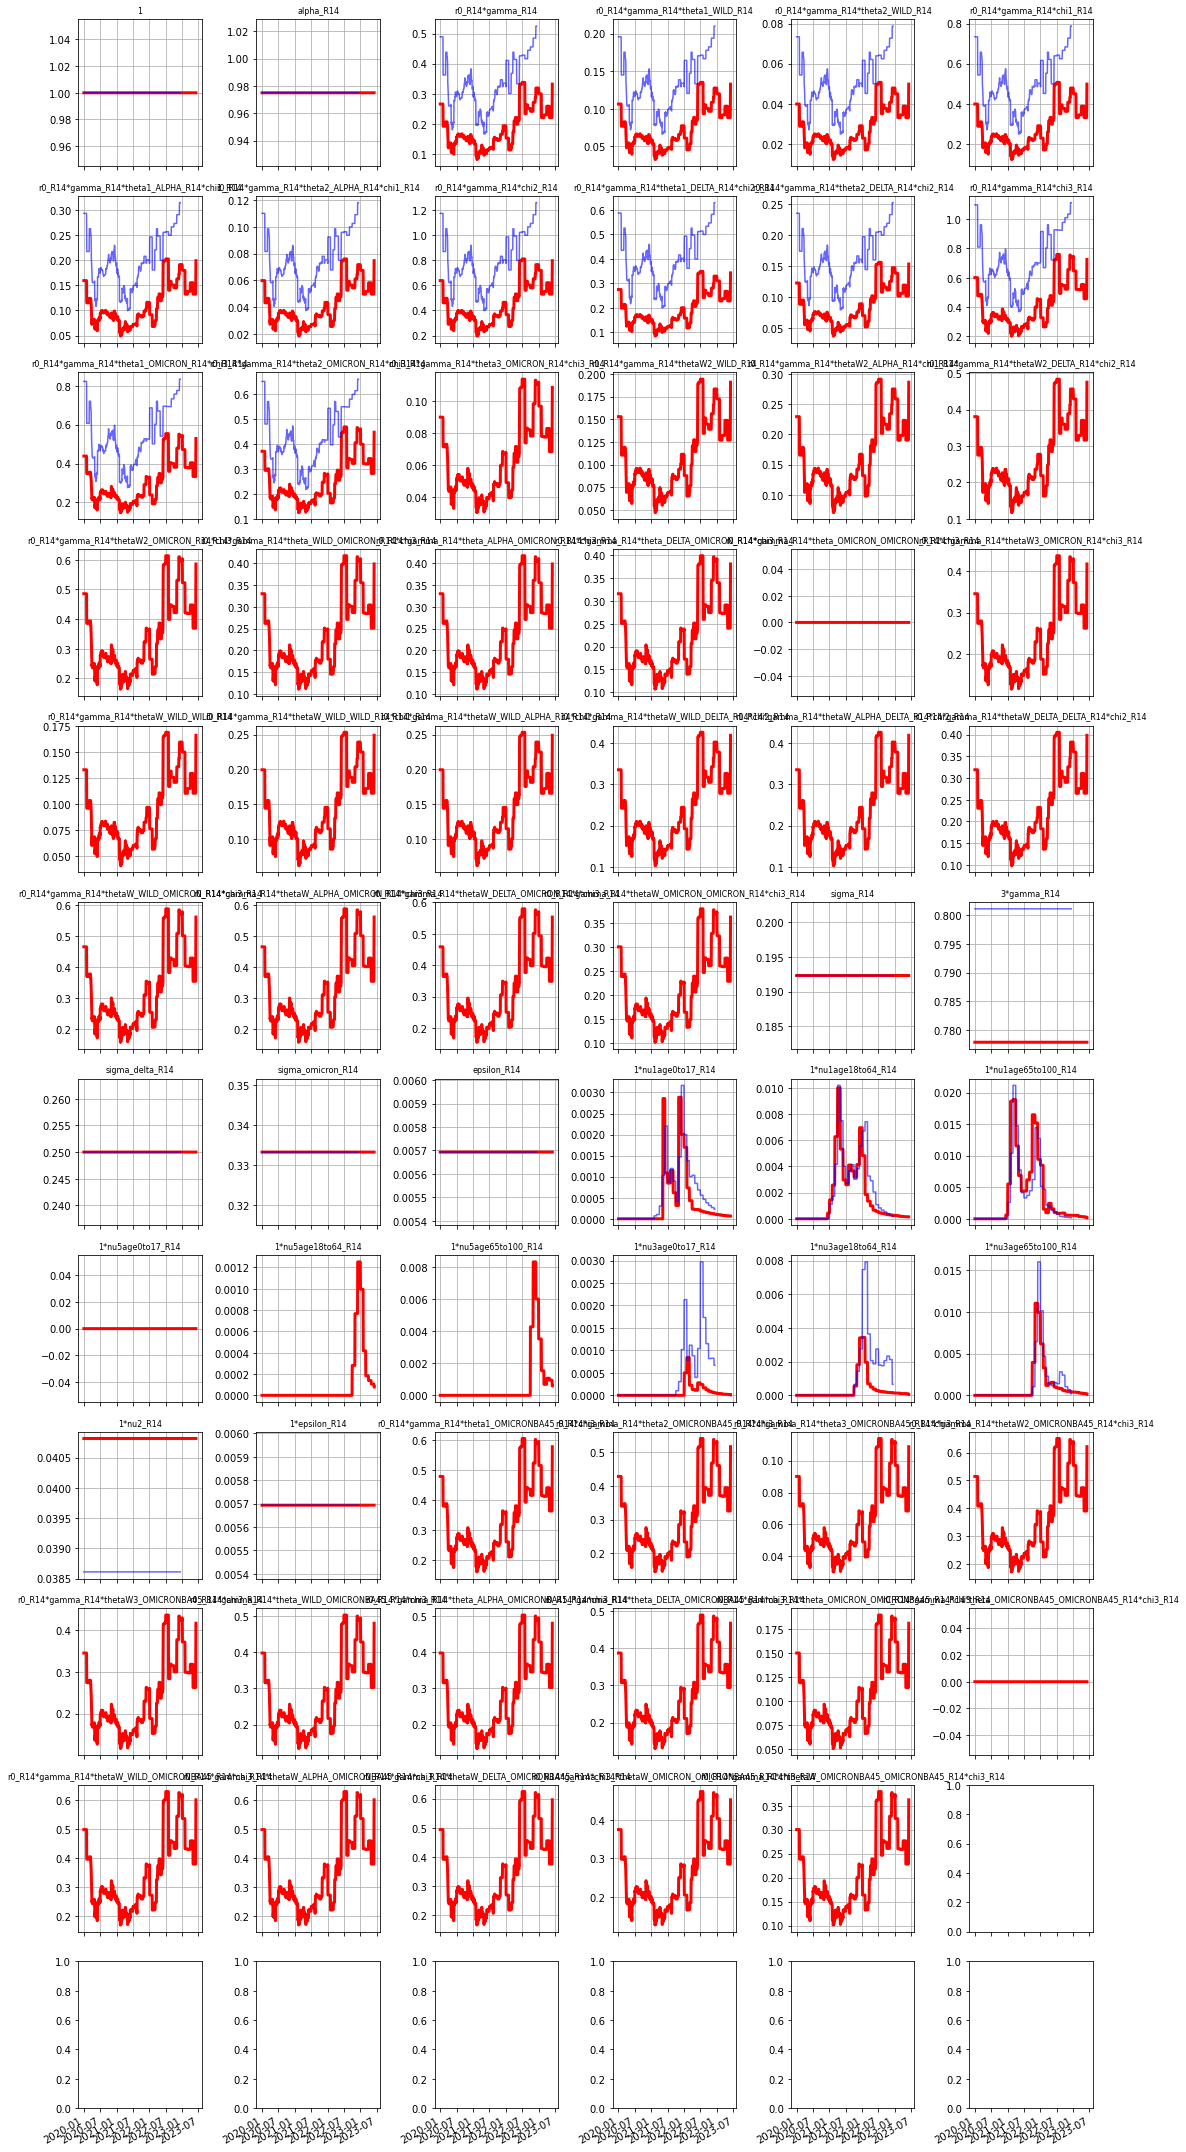

In [224]:
parsed_parametres = gss.debug_parsed_parameters

fig, axes = plt.subplots(12, 6, figsize=(15, 30), sharex=True)

for k, uniq_pname in enumerate(gss.unique_strings):
    ax = axes.flat[k]
    ax.set_title(uniq_pname, fontsize=8)
    ax.grid()
    df = pd.DataFrame(parsed_parameters[k,:].mean(axis=1), index=pd.date_range(gempyor_simulator.s.ti, gempyor_simulator.s.tf, freq="D"))
    ax.plot(df, c = 'r', lw=3)
    if uniq_pname.replace('R14','R13') in gsf.unique_strings:
        print('yes', uniq_pname)
        k = gsf.unique_strings.index(uniq_pname.replace('R14','R13'))
        df = pd.DataFrame(gsf.debug_parsed_parameters[k,:].mean(axis=1), index=pd.date_range(gempyor_simulator_altw.s.ti, gempyor_simulator_altw.s.tf, freq="D"))
        ax.plot(df, c = 'b', alpha=.6)

fig.autofmt_xdate()
fig.tight_layout()
plt.savefig("all_parameters_compare.pdf")

In [229]:
gempyor_simulator.update_prefix(gempyor_simulator_altw.s.in_prefix)
gempyor_simulator.update_run_id(gempyor_simulator_altw.s.in_run_id)
gempyor_simulator.s.ti = gempyor_simulator_altw.s.ti
gempyor_simulator.s.tf = gempyor_simulator_altw.s.tf
outcomes_df1, hpar_df1 = gempyor.outcomes.compute_all_multioutcomes(
                    s=gempyor_simulator.s,
                    sim_id2write=1,
                    parameters=gempyor_simulator.outcomes_parameters,
                    loaded_values=gempyor_simulator.debug_loaded_values,
                    npi=gempyor_simulator.debug_npi_outcomes,
                )

/Users/chadi/opt/miniconda3/envs/covidSProd6/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [230]:
outcomes_df2, hpar_df2 = gempyor.outcomes.compute_all_multioutcomes(
                    s=gempyor_simulator.s,
                    sim_id2write=1,
                    parameters=gempyor_simulator_altw.outcomes_parameters,
                    loaded_values=gempyor_simulator_altw.debug_loaded_values,
                    npi=gempyor_simulator_altw.debug_npi_outcomes,
                )

/Users/chadi/opt/miniconda3/envs/covidSProd6/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


NameError: name 'sim_id' is not defined

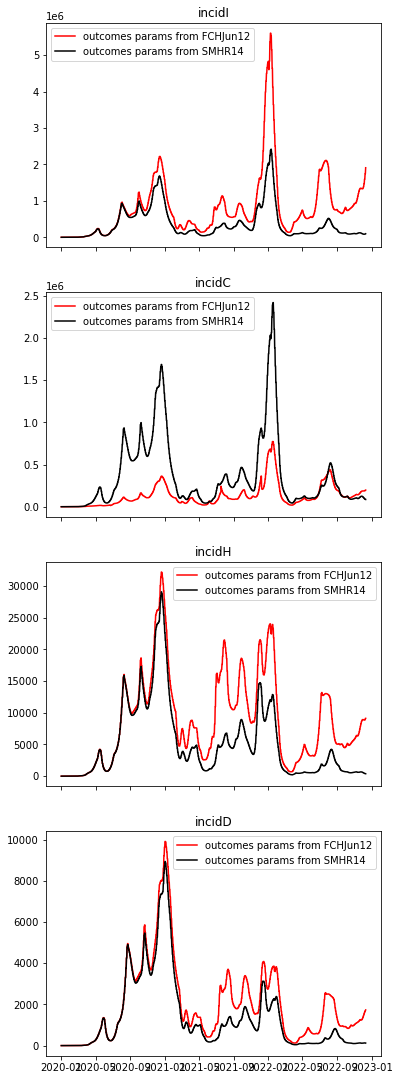

In [246]:

fig, axes = plt.subplots(4,1, figsize=(6, 19), sharex=True)
for i, ot in enumerate(['incidI', 'incidC', 'incidH', 'incidD']):
    ax = axes.flat[i]
    ax.plot(outcomes_df2.groupby('date').sum()[ot], c = 'r', label='outcomes params from FCHJun12')
    ax.plot(outcomes_df1.groupby('date').sum()[ot], c = 'k', label='outcomes params from SMHR14')
    ax.set_title(ot)
    ax.legend()